In [1]:
#data libraries
import pandas as pd
import numpy as np

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

%matplotlib inline

sns.set_style("whitegrid")

In [2]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}

In [3]:
#Reading training data
df_train = pd.read_csv(r'C:\Users\Vinay\Documents\Kaggle\Titanic_Sink\train.csv')

#Reading test data
df_test = pd.read_csv(r'C:\Users\Vinay\Documents\Kaggle\Titanic_Sink\test.csv')

### EDA

In [4]:
dataset = df_train.copy()

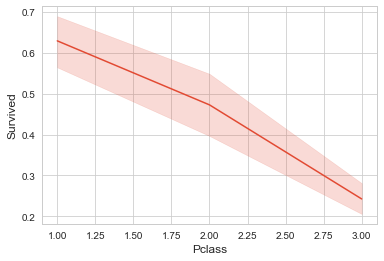

In [5]:
sns.lineplot(x = 'Pclass', y = 'Survived', data = dataset)

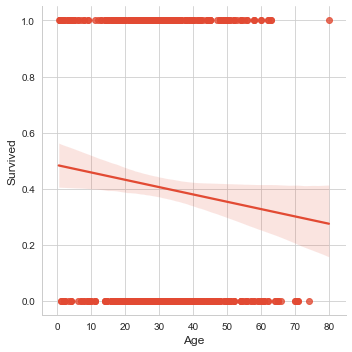

In [6]:
sns.lmplot(x = 'Age', y = 'Survived', data = dataset)

In [7]:
dataset['Age*Class'] = dataset.apply(lambda x: x.Age * x.Pclass, axis=1)

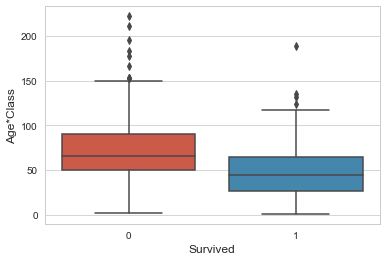

In [8]:
sns.boxplot(x = 'Survived', y = 'Age*Class', data = dataset)

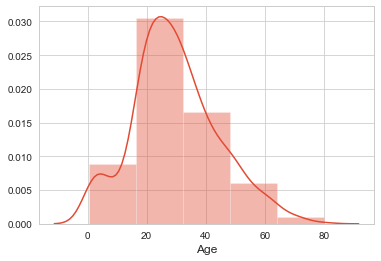

In [9]:
sns.distplot(dataset['Age'], bins= 5)

In [10]:
dataset['Age'].nsmallest()

803    0.42
755    0.67
469    0.75
644    0.75
78     0.83
Name: Age, dtype: float64

In [11]:
dataset['Age_Category'] = pd.cut(dataset['Age'], bins= 5, labels= ['<20', '20-40','40-60','60-80','80-100'])

In [12]:
dataset['Age_Category'].head()

0    20-40
1    40-60
2    20-40
3    40-60
4    40-60
Name: Age_Category, dtype: category
Categories (5, object): [<20 < 20-40 < 40-60 < 60-80 < 80-100]

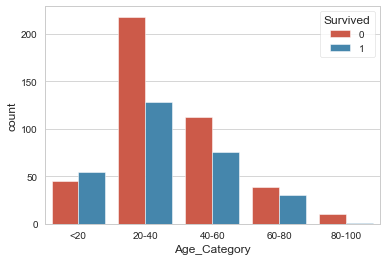

In [13]:
sns.countplot(dataset['Age_Category'], hue= dataset['Survived'])

In [14]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age*Class,Age_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,66.0,20-40
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,40-60
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,78.0,20-40
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,40-60
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,105.0,40-60


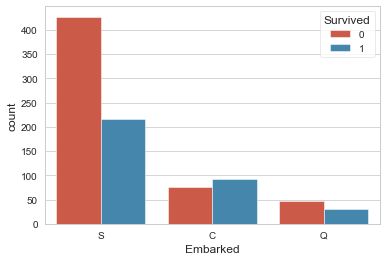

In [15]:
sns.countplot(dataset['Embarked'], hue= dataset['Survived'])

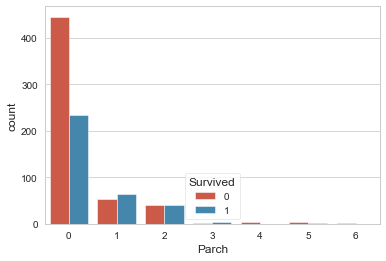

In [16]:
sns.countplot(dataset['Parch'], hue= dataset['Survived'])

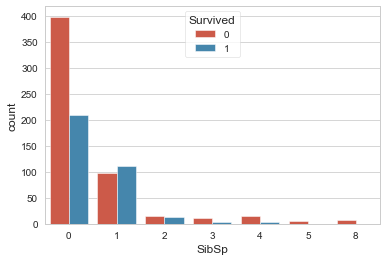

In [17]:
sns.countplot(dataset['SibSp'], hue= dataset['Survived'])

In [18]:
dataset['Alone'] = dataset.apply(lambda x : 1 if (x.Parch + x.SibSp) == 0 else 0, axis=1)

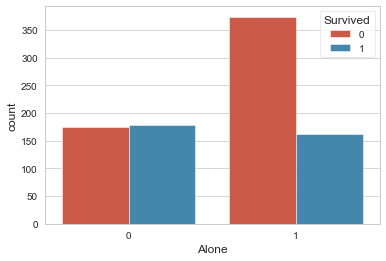

In [19]:
sns.countplot(dataset['Alone'], hue= dataset['Survived'] )

In [20]:
# combining train and test values
data = pd.concat((df_train, df_test)).reset_index(drop=True)
x_Survived = df_train["Survived"]
data.drop(["Survived"], axis = 1, inplace= True)

In [21]:
data.drop('PassengerId', axis=1, inplace= True)

In [22]:
#function to extract title
def extract_title(name) :
    string = name.split(',')[1].split(' ')[1]
    if '.' in string :
        return string[:-1]
    else :
        return string
    
#function to map other titles to standard title
def get_title(title, sex) :
    
    if title not in ['Mr', 'Mrs', 'Master', 'Miss'] :
        
        if title == 'the' :
            #The Countess implies we can use Mrs can be used
            return 'Mrs'
        elif title == 'Jonkheer':
            #The Jonkheer implies we can use Mr can be used
            return 'Mr'
        elif title == 'Mlle':
            return 'Miss'
        elif title == 'Ms':
            return 'Miss'
        elif title == 'Lady':
            return 'Mrs'
        else :
            if sex == 'male' :
                return 'Mr'
            else :
                return 'Mrs'
    else:
        return title
        
#impute age from title
def get_age(age, title) :
    
    if age != age :
        if title == 'Master' :
            return 5.00
        elif title == 'Miss'  :
            return 22.00
        elif title == 'Mr' :
            return 33.00
        else:
            return 36.00
    else :
        return age

In [23]:
data['Title'] = data['Name'].apply(extract_title)
data['Title'] = data.apply(lambda x : get_title(x.Title, x.Sex), axis=1)
data['Age'] = data.apply(lambda x : get_age(x.Age, x.Title), axis=1)

In [24]:
data.loc[1043, 'Fare'] = 14.43
data.loc[61, 'Embarked'] = 'S'
data.loc[829, 'Embarked'] = 'S'

In [25]:
data['Name_Length'] = data['Name'].apply(len)

In [26]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Name_Length
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,23
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,51
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,22
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,44
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,24


In [27]:
data['Age_Category'] = pd.cut(data['Age'], bins= 5, labels= ['<20', '20-40','40-60','60-80','80-100'])

In [28]:
data['Age_Class'] = data.apply(lambda x : x.Age * x.Pclass, axis=1)

In [29]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Name_Length,Age_Category,Age_Class
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,23,20-40,66.0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,51,40-60,38.0
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,22,20-40,78.0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,44,40-60,35.0
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,24,40-60,105.0


In [30]:
data['Alone'] = data.apply(lambda x : 1 if (x.SibSp + x.Parch)==0 else 0, axis=1)

In [31]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Name_Length,Age_Category,Age_Class,Alone
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,23,20-40,66.0,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,51,40-60,38.0,0
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,22,20-40,78.0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,44,40-60,35.0,0
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,24,40-60,105.0,1


In [32]:
main_data = data.copy()

In [33]:
data.drop(['Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace= True)

In [34]:
data.head()

,Pclass,Sex,Fare,Embarked,Title,Name_Length,Age_Category,Age_Class,Alone
0,3,male,7.2500,S,Mr,23,20-40,66.0,0
1,1,female,71.2833,C,Mrs,51,40-60,38.0,0
2,3,female,7.9250,S,Miss,22,20-40,78.0,1
3,1,female,53.1000,S,Mrs,44,40-60,35.0,0
4,3,male,8.0500,S,Mr,24,40-60,105.0,1


In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
encoder = LabelEncoder()

In [37]:
encoder_cols = ['Sex', 'Embarked', 'Age_Category']

for col in encoder_cols :
    data[col] = encoder.fit_transform(data[col])

In [38]:
data.head()

,Pclass,Sex,Fare,Embarked,Title,Name_Length,Age_Category,Age_Class,Alone
0,3,1,7.2500,2,Mr,23,0,66.0,0
1,1,0,71.2833,0,Mrs,51,1,38.0,0
2,3,0,7.9250,2,Miss,22,0,78.0,1
3,1,0,53.1000,2,Mrs,44,1,35.0,0
4,3,1,8.0500,2,Mr,24,1,105.0,1


In [39]:
final_data = data.drop('Title', axis=1)

In [40]:
final_data.head()

,Pclass,Sex,Fare,Embarked,Name_Length,Age_Category,Age_Class,Alone
0,3,1,7.2500,2,23,0,66.0,0
1,1,0,71.2833,0,51,1,38.0,0
2,3,0,7.9250,2,22,0,78.0,1
3,1,0,53.1000,2,44,1,35.0,0
4,3,1,8.0500,2,24,1,105.0,1


###  Spliting Dataset into Train & Test

In [41]:
train_df = final_data.iloc[:891,:]  
train_df['Survived'] = x_Survived
test_df = final_data.iloc[891 :,:] 

C:\Users\Vinay\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [42]:
train_df.head()

,Pclass,Sex,Fare,Embarked,Name_Length,Age_Category,Age_Class,Alone,Survived
0,3,1,7.2500,2,23,0,66.0,0,0
1,1,0,71.2833,0,51,1,38.0,0,1
2,3,0,7.9250,2,22,0,78.0,1,1
3,1,0,53.1000,2,44,1,35.0,0,1
4,3,1,8.0500,2,24,1,105.0,1,0


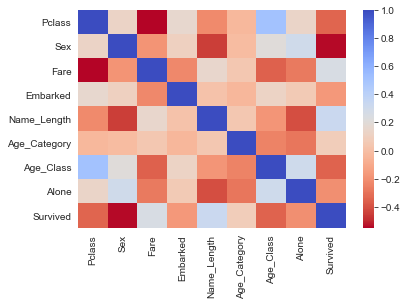

In [43]:
sns.heatmap(train_df.corr(), cmap= 'coolwarm_r')

In [44]:
train_df.corr()['Survived']

Pclass         -0.338481
Sex            -0.543351
Fare            0.257307
Embarked       -0.167675
Name_Length     0.332350
Age_Category    0.081851
Age_Class      -0.347635
Alone          -0.203367
Survived        1.000000
Name: Survived, dtype: float64

In [45]:
X_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']
X_test = test_df

###  Algorithm Testing

###  Ensemble Methods

In [46]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier

In [47]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score, roc_curve, roc_auc_score, accuracy_score

In [48]:
from sklearn.model_selection import cross_val_predict

In [49]:
def error_evalution(model) :
    
    model.fit(X_train, y_train)
    predict_train = model.predict(X_train)
    print("Training Data")
    print(confusion_matrix(y_train, predict_train))
    print(f'Precision Score: {precision_score(y_train, predict_train)}')
    print(f'Recall Score: {recall_score(y_train, predict_train)}')
    print(f'F1 Score: {f1_score(y_train, predict_train)}')
    
    print('-'*50)
    
    print("Validation Data")
    predict_validation = cross_val_predict(model, X_train, y_train, cv = 10)
    y_score = cross_val_predict(model, X_train, y_train, cv = 5, method= "predict_proba")
    y_proba_score = y_score[:,1]
    print("Validation Confusion Matrix")
    print(confusion_matrix(y_train, predict_validation))
    print(f'Accuracy: {accuracy_score(y_train, predict_validation)}')
    print(f'Precision Score: {precision_score(y_train, predict_validation)}')
    print(f'Recall Score: {recall_score(y_train, predict_validation)}')
    print(f'F1 Score: {f1_score(y_train, predict_validation)}')
    
    print('-'*50)
    print(f'AUC: {roc_auc_score(y_train, y_proba_score)}')
    
    fpr_model, tpr_model, threshold = roc_curve(y_train, y_proba_score)

In [50]:
rnf_clf = RandomForestClassifier()

error_evalution(rnf_clf)

Training Data
[[548   1]
 [  2 340]]
Precision Score: 0.9970674486803519
Recall Score: 0.9941520467836257
F1 Score: 0.9956076134699854
--------------------------------------------------
Validation Data
Validation Confusion Matrix
[[484  65]
 [ 98 244]]
Accuracy: 0.8170594837261503
Precision Score: 0.7896440129449838
Recall Score: 0.7134502923976608
F1 Score: 0.7496159754224271
--------------------------------------------------
AUC: 0.8525362434623291


In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
param_grid_rnf = {'n_estimators' : [100, 300, 500, 750, 1000, 1200], 'max_depth' : [3,7, 10, 15], 
                  'max_features' : [0.3, 0.5, 0.75, 'sqrt'], 'min_impurity_decrease' : [0.0, 0.01, 0.03, 0.1]}

In [53]:
grid_search_rf = GridSearchCV(rnf_clf, param_grid= param_grid_rnf, cv= 5, verbose= 3)

In [54]:
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
[CV] max_depth=3, max_features=0.3, min_impurity_decrease=0.0, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=3, max_features=0.3, min_impurity_decrease=0.0, n_estimators=100, score=0.737, total=   0.2s
[CV] max_depth=3, max_features=0.3, min_impurity_decrease=0.0, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=3, max_features=0.3, min_impurity_decrease=0.0, n_estimators=100, score=0.820, total=   0.3s
[CV] max_depth=3, max_features=0.3, min_impurity_decrease=0.0, n_estimators=100 
[CV]  max_depth=3, max_features=0.3, min_impurity_decrease=0.0, n_estimators=100, score=0.826, total=   0.2s

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s



[CV] max_depth=3, max_features=0.3, min_impurity_decrease=0.0, n_estimators=100 
[CV]  max_depth=3, max_features=0.3, min_impurity_decrease=0.0, n_estimators=100, score=0.775, total=   0.2s
[CV] max_depth=3, max_features=0.3, min_impurity_decrease=0.0, n_estimators=100 
[CV]  max_depth=3, max_features=0.3, min_impurity_decrease=0.0, n_estimators=100, score=0.815, total=   0.2s
[CV] max_depth=3, max_features=0.3, min_impurity_decrease=0.0, n_estimators=300 
[CV]  max_depth=3, max_features=0.3, min_impurity_decrease=0.0, n_estimators=300, score=0.721, total=   0.6s
[CV] max_depth=3, max_features=0.3, min_impurity_decrease=0.0, n_estimators=300 
[CV]  max_depth=3, max_features=0.3, min_impurity_decrease=0.0, n_estimators=300, score=0.815, total=   0.7s
[CV] max_depth=3, max_features=0.3, min_impurity_decrease=0.0, n_estimators=300 
[CV]  max_depth=3, max_features=0.3, min_impurity_decrease=0.0, n_estimators=300, score=0.843, total=   0.6s
[CV] max_depth=3, max_features=0.3, min_impurity_

KeyboardInterrupt: 

In [ ]:
grid_search_rf.best_params_

In [59]:
optimized_rnf_clf = RandomForestClassifier(n_estimators= 750, max_features= 0.3, max_depth= 10, min_impurity_decrease= 0.0,
                                          random_state= 42)

In [60]:
# n_estimators = 750, max_features = 0.3, max_depth = 10, min_impurity_decreases = 0.0

error_evalution(optimized_rnf_clf)

Training Data
[[544   5]
 [ 38 304]]
Precision Score: 0.9838187702265372
Recall Score: 0.8888888888888888
F1 Score: 0.9339477726574501
--------------------------------------------------
Validation Data
Validation Confusion Matrix
[[498  51]
 [ 96 246]]
Accuracy: 0.835016835016835
Precision Score: 0.8282828282828283
Recall Score: 0.7192982456140351
F1 Score: 0.7699530516431925
--------------------------------------------------
AUC: 0.8632601540280573


In [57]:
param_grid_rnf_2 = {'min_samples_split' : [2,3,5,7,10], 'min_samples_leaf' : [1,2,3,4] }

In [58]:
grid_search_rf_2 = GridSearchCV(optimized_rnf_clf_2, param_grid= param_grid_rnf_2, cv= 5, verbose= 3)

NameError: name 'optimized_rnf_clf_2' is not defined

In [ ]:
grid_search_rf_2.fit(X_train, y_train)

In [ ]:
grid_search_rf_2.best_params_

In [61]:
optimized_rnf_clf_2 = RandomForestClassifier(n_estimators= 750, max_features= 0.3, max_depth= 10, min_impurity_decrease= 0.0,
                                            min_samples_split= 2, min_samples_leaf= 1, random_state= 42  )

error_evalution(optimized_rnf_clf_2)

Training Data
[[544   5]
 [ 38 304]]
Precision Score: 0.9838187702265372
Recall Score: 0.8888888888888888
F1 Score: 0.9339477726574501
--------------------------------------------------
Validation Data
Validation Confusion Matrix
[[498  51]
 [ 96 246]]
Accuracy: 0.835016835016835
Precision Score: 0.8282828282828283
Recall Score: 0.7192982456140351
F1 Score: 0.7699530516431925
--------------------------------------------------
AUC: 0.8632601540280573


In [ ]:
optimized_rnf_clf_2.fit(X_train, y_train)

In [ ]:
predictions = optimized_rnf_clf_2.predict(X_test)

In [103]:
submission = pd.DataFrame(columns=["PassengerId", "Survived"])

In [104]:
passenger_id = list(range(892, 1310))

In [106]:
submission['PassengerId'] = passenger_id
submission['Survived'] = predictions

In [107]:
submission.to_csv('Optimized Random Forest.txt', index= False)

In [62]:
optimized_rnf_clf_2 = RandomForestClassifier(n_estimators= 750, max_features= 0.3, max_depth= 10, min_impurity_decrease= 0.0,
                                            min_samples_split= 2, min_samples_leaf= 1, max_leaf_nodes= None, max_samples= 0.5  )

error_evalution(optimized_rnf_clf_2)

Training Data
[[535  14]
 [ 50 292]]
Precision Score: 0.954248366013072
Recall Score: 0.8538011695906432
F1 Score: 0.9012345679012346
--------------------------------------------------
Validation Data
Validation Confusion Matrix
[[500  49]
 [100 242]]
Accuracy: 0.8327721661054994
Precision Score: 0.8316151202749141
Recall Score: 0.7076023391812866
F1 Score: 0.764612954186414
--------------------------------------------------
AUC: 0.8669670533346117


In [121]:
feature_importance = grid_search_rf_2.best_estimator_.feature_importances_

features = pd.DataFrame(data= feature_importance.reshape(1,-1), columns= X_train.columns)

In [122]:
features

,Pclass,Sex,Fare,Embarked,Name_Length,Age_Category,Age_Class,Alone
0,0.091832,0.292394,0.173743,0.035074,0.15591,0.040608,0.189679,0.020761


### Changing Data

In [63]:
main_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Name_Length,Age_Category,Age_Class,Alone
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,23,20-40,66.0,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,51,40-60,38.0,0
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,22,20-40,78.0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,44,40-60,35.0,0
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,24,40-60,105.0,1


In [64]:
data = main_data.copy()

In [65]:
data.drop(['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace= True)

In [66]:
data.head()

,Pclass,Sex,Age,Fare,Embarked,Title,Name_Length,Age_Category,Age_Class,Alone
0,3,male,22.0,7.2500,S,Mr,23,20-40,66.0,0
1,1,female,38.0,71.2833,C,Mrs,51,40-60,38.0,0
2,3,female,26.0,7.9250,S,Miss,22,20-40,78.0,1
3,1,female,35.0,53.1000,S,Mrs,44,40-60,35.0,0
4,3,male,35.0,8.0500,S,Mr,24,40-60,105.0,1


In [67]:
features = pd.get_dummies(data[['Sex', 'Embarked', 'Title', 'Age_Category']], drop_first= True)

In [68]:
data = pd.concat([data.drop(['Sex', 'Embarked', 'Title', 'Age_Category'], axis =1), features], axis=1)

In [69]:
data.head()

,Pclass,Age,Fare,Name_Length,Age_Class,Alone,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Age_Category_20-40,Age_Category_40-60,Age_Category_60-80,Age_Category_80-100
0,3,22.0,7.2500,23,66.0,0,1,0,1,0,1,0,1,0,0,0
1,1,38.0,71.2833,51,38.0,0,0,0,0,0,0,1,0,1,0,0
2,3,26.0,7.9250,22,78.0,1,0,0,1,1,0,0,1,0,0,0
3,1,35.0,53.1000,44,35.0,0,0,0,1,0,0,1,0,1,0,0
4,3,35.0,8.0500,24,105.0,1,1,0,1,0,1,0,0,1,0,0


In [70]:
train_df = data.iloc[:891,:]  
train_df['Survived'] = x_Survived
test_df = data.iloc[891 :,:] 

C:\Users\Vinay\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [71]:
X_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']
X_test = test_df

In [76]:
optimized_rnf_clf_2 = RandomForestClassifier(n_estimators= 750, max_features= 0.3, max_depth= 10, min_impurity_decrease= 0.0,
                                            min_samples_split= 2, min_samples_leaf= 1, max_leaf_nodes= None,
                                            random_state= 42)

error_evalution(optimized_rnf_clf_2)

Training Data
[[548   1]
 [ 39 303]]
Precision Score: 0.9967105263157895
Recall Score: 0.8859649122807017
F1 Score: 0.9380804953560371
--------------------------------------------------
Validation Data
Validation Confusion Matrix
[[500  49]
 [ 98 244]]
Accuracy: 0.835016835016835
Precision Score: 0.8327645051194539
Recall Score: 0.7134502923976608
F1 Score: 0.7685039370078741
--------------------------------------------------
AUC: 0.8665143429307939


### Data 3

In [77]:
main_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Name_Length,Age_Category,Age_Class,Alone
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,23,20-40,66.0,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,51,40-60,38.0,0
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,22,20-40,78.0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,44,40-60,35.0,0
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,24,40-60,105.0,1


In [78]:
main_data['Family'] = main_data['Name'].apply(lambda x : x.split(',')[0])

In [79]:
df_train['Family'] = df_train['Name'].apply(lambda x : x.split(',')[0])

Family_data = df_train.groupby('Family').sum()['Survived']/df_train.groupby('Family').count()['Survived']

Family_data = pd.DataFrame(Family_data)

Family_data.reset_index(inplace= True)

Family_data.rename(columns= {'Survived' : 'Family_Sur_rate'}, inplace= True)

In [80]:
Family_data.head()

,Family,Family_Sur_rate
0,Abbing,0.0
1,Abbott,0.5
2,Abelson,0.5
3,Adahl,0.0
4,Adams,0.0


In [81]:
main_data = pd.merge(main_data, Family_data, on='Family')

In [82]:
main_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Name_Length,Age_Category,Age_Class,Alone,Family,Family_Sur_rate
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,23,20-40,66.0,0,Braund,0.0
1,3,"Braund, Mr. Lewis Richard",male,29.0,1,0,3460,7.0458,NaN,S,Mr,25,20-40,87.0,0,Braund,0.0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,51,40-60,38.0,0,Cumings,1.0
3,1,"Cumings, Mr. John Bradley",male,39.0,1,0,PC 17599,71.2833,C85,C,Mr,25,40-60,39.0,0,Cumings,1.0
4,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,22,20-40,78.0,1,Heikkinen,1.0


In [83]:
data = main_data.copy()

In [84]:
data.drop(['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Family'], axis=1, inplace= True)

In [85]:
data.head()

,Pclass,Sex,Age,Fare,Embarked,Title,Name_Length,Age_Category,Age_Class,Alone,Family_Sur_rate
0,3,male,22.0,7.2500,S,Mr,23,20-40,66.0,0,0.0
1,3,male,29.0,7.0458,S,Mr,25,20-40,87.0,0,0.0
2,1,female,38.0,71.2833,C,Mrs,51,40-60,38.0,0,1.0
3,1,male,39.0,71.2833,C,Mr,25,40-60,39.0,0,1.0
4,3,female,26.0,7.9250,S,Miss,22,20-40,78.0,1,1.0


In [86]:
features = pd.get_dummies(data[['Sex', 'Embarked', 'Title', 'Age_Category']], drop_first= True)

data = pd.concat([data.drop(['Sex', 'Embarked', 'Title', 'Age_Category'], axis =1), features], axis=1)

In [87]:
data.head(3)

,Pclass,Age,Fare,Name_Length,Age_Class,Alone,Family_Sur_rate,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Age_Category_20-40,Age_Category_40-60,Age_Category_60-80,Age_Category_80-100
0,3,22.0,7.2500,23,66.0,0,0.0,1,0,1,0,1,0,1,0,0,0
1,3,29.0,7.0458,25,87.0,0,0.0,1,0,1,0,1,0,1,0,0,0
2,1,38.0,71.2833,51,38.0,0,1.0,0,0,0,0,0,1,0,1,0,0


In [92]:
final_data_3 = data.drop('Family_Sur_rate', axis=1)

In [93]:
train_df = final_data_3.iloc[:891,:]  
train_df['Survived'] = x_Survived
test_df = final_data_3.iloc[891 :,:] 

C:\Users\Vinay\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [94]:
X_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']
X_test = test_df

In [95]:
optimized_rnf_clf_2 = RandomForestClassifier(n_estimators= 750, max_features= 0.3, max_depth= 10, min_impurity_decrease= 0.0,
                                            min_samples_split= 2, min_samples_leaf= 1, max_leaf_nodes= None,
                                            random_state= 42)

error_evalution(optimized_rnf_clf_2)

Training Data
[[549   0]
 [103 239]]
Precision Score: 1.0
Recall Score: 0.6988304093567251
F1 Score: 0.8227194492254734
--------------------------------------------------
Validation Data
Validation Confusion Matrix
[[447 102]
 [269  73]]
Accuracy: 0.5836139169472503
Precision Score: 0.41714285714285715
Recall Score: 0.2134502923976608
F1 Score: 0.2823984526112186
--------------------------------------------------
AUC: 0.5440087772558294
